In [4]:
import os
from fastai.vision.all import *
from fastai.data.all import *
from fastai.vision.widgets import *


In [2]:
torch.cuda.set_device(6)

In [6]:
os.listdir(path)

['healthy_sb', 'synthetic_sb']

In [5]:
path = 'models_data/453_seg_sb_n_1k_syn_sb'
len(os.listdir(path)), path

(2, 'models_data/453_seg_sb_n_1k_syn_sb')

In [7]:
fnames = get_image_files(path)
fnames

(#1453) [Path('models_data/453_seg_sb_n_1k_syn_sb/healthy_sb/1.png'),Path('models_data/453_seg_sb_n_1k_syn_sb/healthy_sb/10.png'),Path('models_data/453_seg_sb_n_1k_syn_sb/healthy_sb/100.png'),Path('models_data/453_seg_sb_n_1k_syn_sb/healthy_sb/101.png'),Path('models_data/453_seg_sb_n_1k_syn_sb/healthy_sb/102.png'),Path('models_data/453_seg_sb_n_1k_syn_sb/healthy_sb/103.png'),Path('models_data/453_seg_sb_n_1k_syn_sb/healthy_sb/104.png'),Path('models_data/453_seg_sb_n_1k_syn_sb/healthy_sb/105.png'),Path('models_data/453_seg_sb_n_1k_syn_sb/healthy_sb/106.png'),Path('models_data/453_seg_sb_n_1k_syn_sb/healthy_sb/107.png')...]

(256, 256)

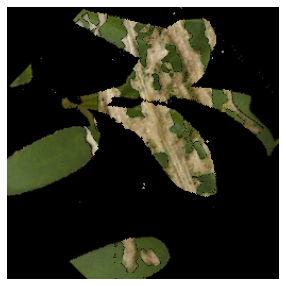

In [8]:
im = PILImage.create(fnames[800])
im.show()
im.size

# Build Datablocks and Train Model

In [9]:

plants = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    batch_tfms=aug_transforms())

In [10]:
dls = plants.dataloaders(path, bs=32)

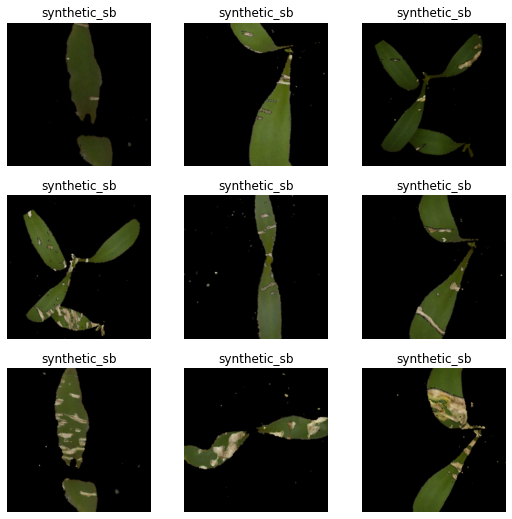

In [11]:
dls.show_batch()

# ResNet 34 Model 

In [16]:

learn_res34 = cnn_learner(dls, resnet34, metrics=(error_rate, accuracy))
learn_res34.fine_tune(10)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.561589,0.276324,0.113793,0.886207,00:05


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.110004,0.415812,0.162069,0.837931,00:05
1,0.060701,0.132601,0.034483,0.965517,00:05
2,0.034622,0.008308,0.003448,0.996552,00:05
3,0.069062,0.481469,0.103448,0.896552,00:05
4,0.056537,0.012936,0.003448,0.996552,00:05
5,0.031665,0.030992,0.017241,0.982759,00:05
6,0.019627,0.010095,0.006897,0.993103,00:05
7,0.012851,0.035768,0.010345,0.989655,00:05
8,0.011647,0.021909,0.006897,0.993103,00:05
9,0.006205,0.021838,0.013793,0.986207,00:05


In [39]:
learn_res34.save('resnet-34')

Path('models/resnet-34.pth')

In [51]:
learn_res34.export('resnet-34.pkl')

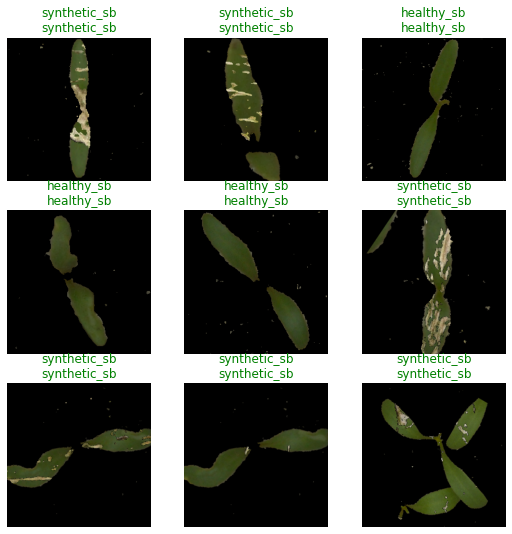

In [17]:
learn_res34.show_results()

# Evaluate Model

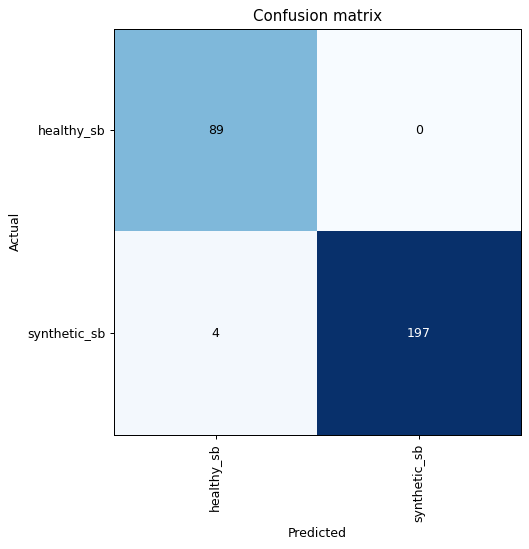

In [18]:

interp_res34 = ClassificationInterpretation.from_learner(learn_res34)
interp_res34.plot_confusion_matrix(dpi = 90,figsize = (6,6))

In [33]:
learn_res34.summary()

Sequential (Input shape: 32 x 3 x 256 x 256)
Layer (type)         Output Shape         Param #    Trainable 
                     32 x 64 x 128 x 128 
Conv2d                                    9408       True      
BatchNorm2d                               128        True      
ReLU                                                           
____________________________________________________________________________
                     32 x 64 x 64 x 64   
MaxPool2d                                                      
Conv2d                                    36864      True      
BatchNorm2d                               128        True      
ReLU                                                           
Conv2d                                    36864      True      
BatchNorm2d                               128        True      
Conv2d                                    36864      True      
BatchNorm2d                               128        True      
ReLU                      

# AlexNet Architecture

In [19]:

learn_alex = cnn_learner(dls, alexnet, metrics=(error_rate, accuracy))
learn_alex.fine_tune(10)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.608920,0.210507,0.082759,0.917241,00:04


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.154249,0.124964,0.055172,0.944828,00:04
1,0.106374,0.117971,0.062069,0.937931,00:04
2,0.067565,0.046805,0.013793,0.986207,00:04
3,0.046688,0.411851,0.151724,0.848276,00:04
4,0.026382,0.165433,0.072414,0.927586,00:04
5,0.027643,0.266070,0.096552,0.903448,00:04
6,0.028489,0.303151,0.093103,0.906897,00:03
7,0.015724,0.167522,0.068966,0.931035,00:04
8,0.013177,0.145957,0.051724,0.948276,00:04
9,0.018677,0.192707,0.068966,0.931035,00:04


In [13]:
learn_alex.save('alexnet')

Path('models/alexnet.pth')

In [50]:
learn_alex.export('alexnet.pkl')

# Evaluate Model

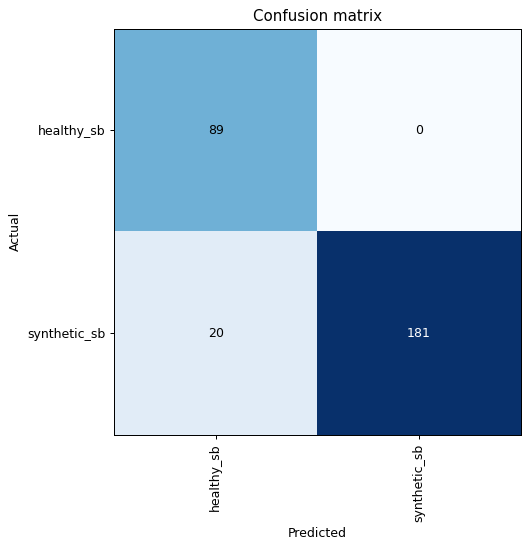

In [20]:

interp_alex = ClassificationInterpretation.from_learner(learn_alex)
interp_alex.plot_confusion_matrix(dpi = 90,figsize = (6,6))

In [21]:
learn_alex.summary()

Sequential (Input shape: 32 x 3 x 256 x 256)
Layer (type)         Output Shape         Param #    Trainable 
                     32 x 64 x 63 x 63   
Conv2d                                    23296      True      
ReLU                                                           
____________________________________________________________________________
                     32 x 64 x 31 x 31   
MaxPool2d                                                      
____________________________________________________________________________
                     32 x 192 x 31 x 31  
Conv2d                                    307392     True      
ReLU                                                           
____________________________________________________________________________
                     32 x 192 x 15 x 15  
MaxPool2d                                                      
____________________________________________________________________________
                     32 x 384 x

# ResNet 152 Architecture

In [12]:

learn_res152 = cnn_learner(dls, resnet152, metrics=(error_rate, accuracy))
learn_res152.fine_tune(10)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.359911,2.052010,0.341379,0.658621,00:12


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.081852,0.433029,0.106897,0.893103,00:15
1,0.039717,2.563725,0.324138,0.675862,00:14
2,0.106691,1.898518,0.251724,0.748276,00:15
3,0.108348,3.393010,0.258621,0.741379,00:14
4,0.068565,0.553690,0.131034,0.868966,00:15
5,0.037151,0.139947,0.044828,0.955172,00:14
6,0.018150,0.255813,0.075862,0.924138,00:15
7,0.013237,0.066527,0.006897,0.993103,00:15
8,0.012297,0.097116,0.027586,0.972414,00:15
9,0.014766,0.077512,0.017241,0.982759,00:14


In [18]:
learn_res152.save('resnet_1k_syn-152')

Path('models/resnet-152.pth')

In [13]:
learn_res152.export('resnet-152_1k_syn.pkl')

# Evaluate Model

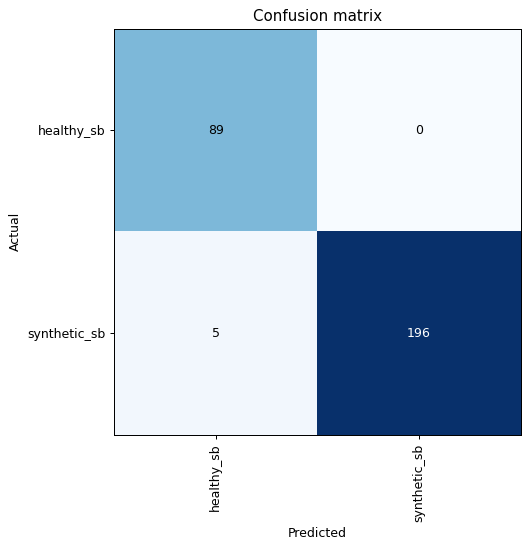

In [14]:

interp_res152 = ClassificationInterpretation.from_learner(learn_res152)
interp_res152.plot_confusion_matrix(dpi = 90,figsize = (6,6))

In [31]:
learn_res152.summary()

Sequential (Input shape: 32 x 3 x 256 x 256)
Layer (type)         Output Shape         Param #    Trainable 
                     32 x 64 x 128 x 128 
Conv2d                                    9408       True      
BatchNorm2d                               128        True      
ReLU                                                           
____________________________________________________________________________
                     32 x 64 x 64 x 64   
MaxPool2d                                                      
Conv2d                                    4096       True      
BatchNorm2d                               128        True      
Conv2d                                    36864      True      
BatchNorm2d                               128        True      
____________________________________________________________________________
                     32 x 256 x 64 x 64  
Conv2d                                    16384      True      
BatchNorm2d                        